## Project 7 Task 3

Author: [Christian Jackson](https://github.com/ChristianJBNB) <br />
Project Repo: [datafun-06-Projects](https://github.com/ChristianJBNB/datafun-07-ml-predictive) <br />
Date: 6/20/23

In [1]:
# Use pandas DataFrames to plot Celsius vs Fahrenheit 

c = lambda f: 5 / 9 * (f-32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

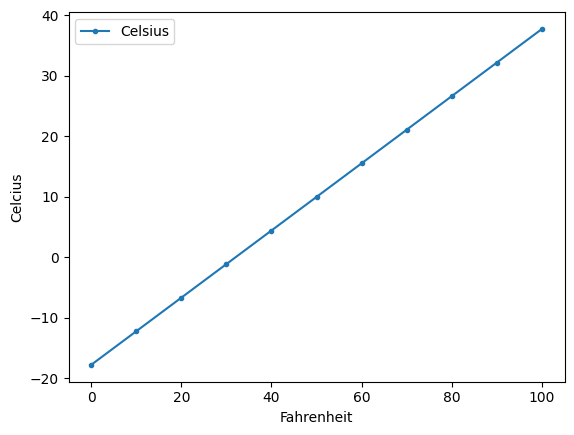

In [4]:
import pandas as pd

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celcius')

In [5]:
# Follow the instructions to load NY City January high temperature from a csv file into a DataFrame.

nyc = pd.read_csv('ave_hi_nyc_jan_1985-2018.csv')

In [8]:
# Follow the instructions to view head and tail of the file. 

nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [7]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


In [9]:
# Follow the instructions to clean the data.

nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [10]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [13]:
# Use describe() to calculate basic descriptive statistics for the dataset. 

pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

In [15]:
# Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.

from scipy import stats

linear_regression = stats.linregress(x = nyc.Date, y = nyc.Temperature)
linear_regression.slope

0.014771361132966163

In [16]:
linear_regression.intercept

8.694993233674289

In [17]:
# Use your results to predict the "average high temp in Jan" for the year 2026. 

linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

(10.0, 70.0)

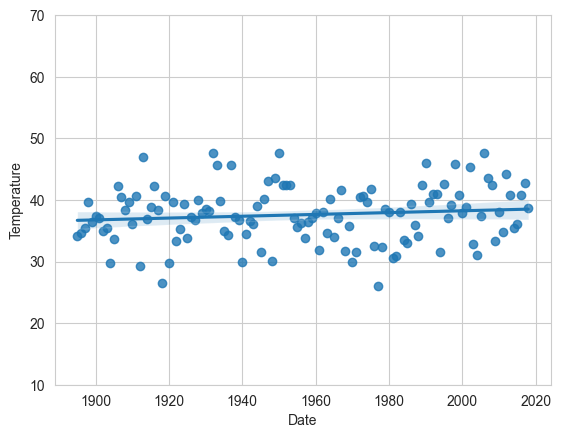

In [19]:
# Follow the instructions and use Seaborn to generate a scatter plot with a best fit line. Set the axes and y limit as instructed.

import seaborn as sns

sns.set_style('whitegrid')
axes = sns.regplot(x = nyc.Date, y = nyc.Temperature)
axes.set_ylim(10,70)